## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle
import os
from collections import OrderedDict
from bokeh.models import TabPanel, Tabs
import bokeh

sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils_final, file_utils, expr_data_utils, print_utils

In [2]:
palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [3]:
phases_dict = OrderedDict([('full', None)])

metric = 'manhattan'
# metric='minkowski_3.0'

resolution_param=0.005
# resolution_param=0.0001

n_neighbors = 3

dataset = 'microarray'

add_scalar=0

In [4]:
full_filtered_df = pd.read_csv('../../active_files/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')

phases_dict['full'] = full_filtered_df

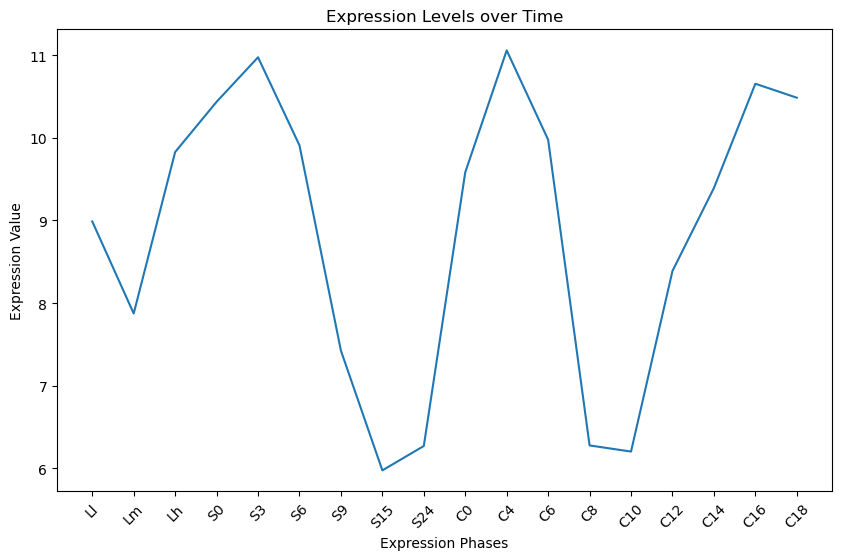

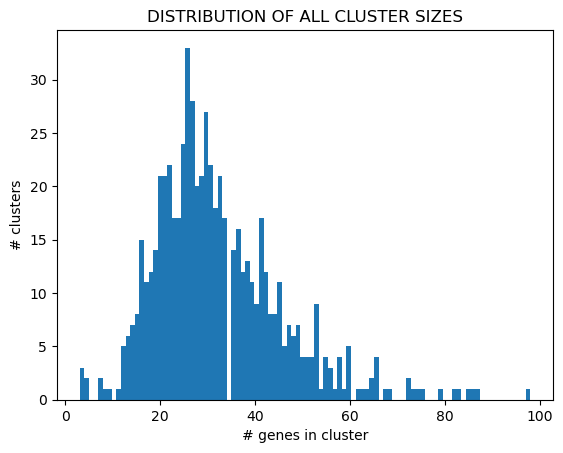

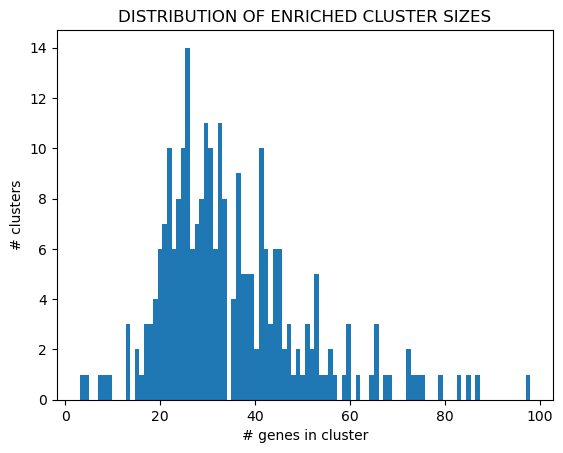

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.033787449579642706
                  modularity: 0.7619902583846102
                   nclusters: 636
           mean_cluster_size: 32.119496855345915
         median_cluster_size: 30.0
             sd_cluster_size: 13.583362362838548
          nenriched_clusters: 255
  mean_enriched_cluster_size: 35.09803921568628
median_enriched_cluster_size: 32.0
    sd_enriched_cluster_size: 15.089608035503401
     nenriched_cluster_genes: 8950
                    datetime: 2024-07-26 11:47:36.238622


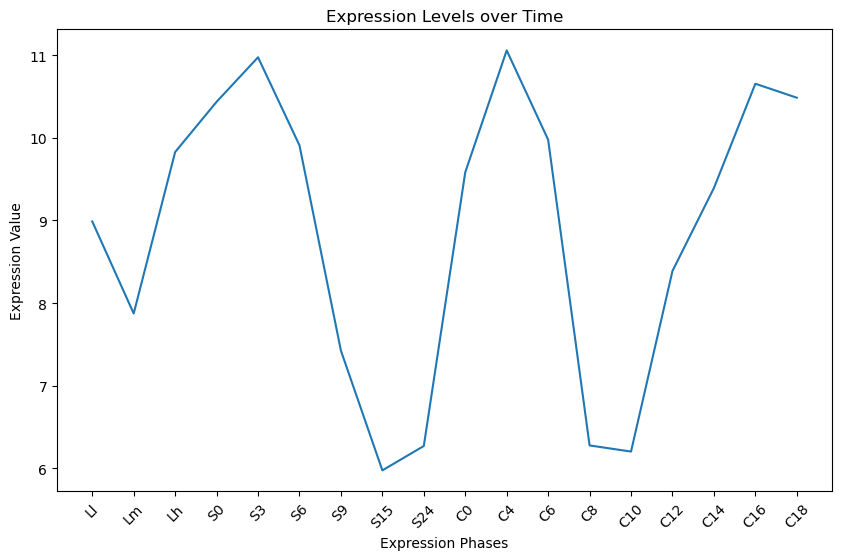

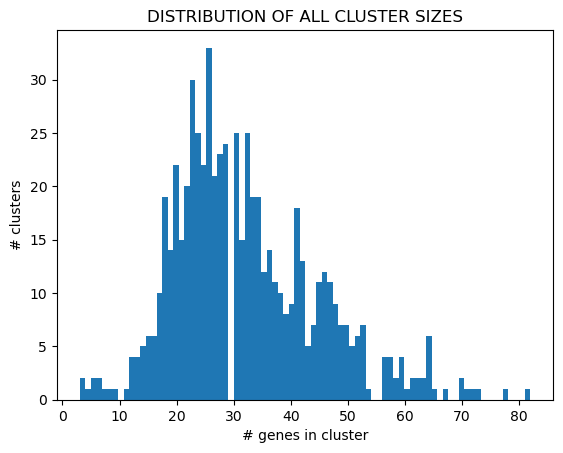

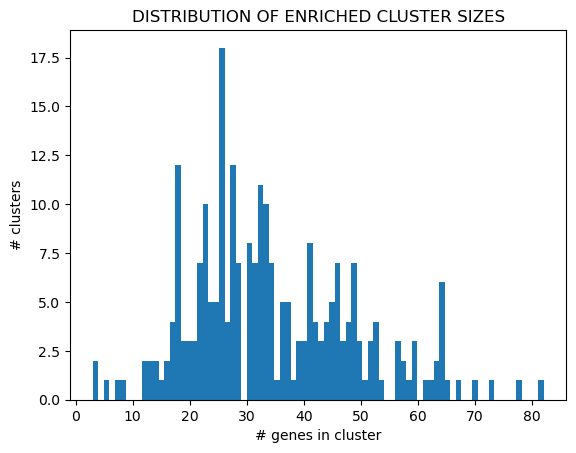

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.022923077635525518
                  modularity: 0.7700419406476356
                   nclusters: 636
           mean_cluster_size: 32.119496855345915
         median_cluster_size: 30.0
             sd_cluster_size: 12.645189395227938
          nenriched_clusters: 250
  mean_enriched_cluster_size: 34.572
median_enriched_cluster_size: 32.0
    sd_enriched_cluster_size: 14.371806288702892
     nenriched_cluster_genes: 8643
                    datetime: 2024-07-26 11:48:45.722423


/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

./plots/dashboard622_microarray_full_umap_manhattan_3nn_0.005rp.html


In [5]:
tab_name_dict = {'full': 'All conditions'}

for it_idx, (phases, curr_df) in enumerate(phases_dict.items()):
    data_dict = {
                    'expression_dfs':   [
                                        expr_data_utils.mean_df_of_duplicates(
                                            expr_data_utils.normalize_expression_per_gene(curr_df, 'z_score', add_scalar=add_scalar), mean_type='arithmetic'), 
                                        expr_data_utils.mean_df_of_duplicates(
                                            expr_data_utils.normalize_expression_per_gene(curr_df, 'min_max', add_scalar=add_scalar), mean_type='arithmetic')
                                        ],
                    'tab_labels': ['Z-score normalization', 'Min-max normalization'],
                    'expr_mins': [-3, 0],
                    'expr_maxs': [3, 1],
                    'label_dfs': [],
                    'enrich_dfs': [],
                    'avg_dfs': [],
                    'color_palettes': []
                }

    for full_filtered_norm_df in data_dict['expression_dfs']:

        num_genes = curr_df.shape[0]

        df = expr_data_utils.mean_df_of_duplicates(curr_df.loc[curr_df['TTHERM_ID'] == 'TTHERM_00092820'], mean_type='arithmetic')

        phase_list = list(df.columns)[1:]
        expression_values = [df[col].values[0] for col in list(df.columns)[1:]]

        plt.figure(figsize=(10, 6))  

        plt.plot(phase_list, expression_values, linestyle='-')

        plt.xlabel("Expression Phases")
        plt.ylabel("Expression Value")
        plt.title("Expression Levels over Time")

        plt.xticks(rotation=45)

        plt.show()

        full_filtered_norm_df.head()
        leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
            full_filtered_norm_df, 
            dataset,
            metric=metric, 
            n_neighbors=n_neighbors, 
            resolution_param=resolution_param, 
            partition_type = 'EXP', 
            n_jobs = -1, 
            random_state=42
            )
        leiden_label_df_round_1_arranged = bokeh_ui_utils_final.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
        leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
        if it_idx == 0:
            leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)
        avg_full_filtered_norm_df = clustering_utils.ari_mean_nexpr_per_mod(full_filtered_norm_df, leiden_label_df_round_1_arranged_sorted)
        plt.hist(cluster_sizes, max(cluster_sizes))
        plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
        plt.xlabel('# genes in cluster')
        plt.ylabel('# clusters')
        plt.show()
        plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
        plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
        plt.xlabel('# genes in cluster')
        plt.ylabel('# clusters')
        plt.show()
        
        print_utils.print_aligned_dict(partition_stats)

        enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)
        
        if it_idx == 0:
            outfile='../enrichment/test_nn3_full_enrichment.csv'
            enrich_full_nn3.to_csv(outfile, index=False)
            complete_annot = pd.read_csv('../../active_files/complete_annotation.csv')

        data_dict['label_dfs'].append(leiden_label_df_round_1_arranged_sorted)
        data_dict['enrich_dfs'].append(enrich_full_nn3)
        data_dict['avg_dfs'].append(avg_full_filtered_norm_df)



    with open(('colors_2000_1'), 'rb') as file:
        color_palette_raw = pickle.load(file)

    for _df in data_dict['label_dfs']:
        color_palette = palette65

        if len(color_palette_raw) >= max(_df['label'].unique()) + 1:
            color_palette = color_palette_raw[: max(_df['label'].unique()) + 1]

        data_dict['color_palettes'].append(color_palette)

    yf_to_ttherm_map_df = None

    embedding_metric = 'manhattan'

    dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=[dataset, phases, 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

    p = bokeh_ui_utils_final.generate_and_save_umap_tabbed(
                                                dashboard_path, 
                                                data_dict['expression_dfs'], 
                                                data_dict['tab_labels'],
                                                data_dict['enrich_dfs'], 
                                                complete_annot, 
                                                data_dict['label_dfs'], 
                                                phases, 
                                                data_dict['color_palettes'], 
                                                'TGNE_microarray', 
                                                expr_mins=data_dict['expr_mins'], 
                                                expr_maxs=data_dict['expr_maxs'], 
                                                embedding_metric=embedding_metric, 
                                                n_neighbors=n_neighbors, 
                                                yf_to_ttherm_map_df=yf_to_ttherm_map_df, 
                                                avg_dfs=data_dict['avg_dfs']
                                                )
    